In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import math

np.set_printoptions(suppress=True)
%config InlineBackend.figure_format = 'retina'

In [149]:
sales = -34.70 + 6.023 * 25
sales

115.87499999999999

In [150]:
profit1 = 95000*(3-1.25) - 150000
profit2 = sales*1000*(3-1.30) - 175000
print(profit1, profit2)

16250.0 21987.49999999997


In [151]:
df = pd.read_excel('gas_stations.xlsx')

In [152]:
df.head()

,sales_monthly,traffic,traffic_light,car_wash,car_center,age,npumps,canopy_coverage,noair_water,ncomp
0,5.0,17.420000,0,0,0,15,2,0,0,0
1,140.0,23.049999,1,1,0,4,6,100,0,0
2,50.0,18.386999,0,0,0,7,2,100,0,0
3,75.0,20.705999,0,0,0,4,4,100,0,0
4,150.0,23.447001,1,1,0,2,6,100,0,1


In [153]:
df1 = df.sample(n=400, random_state=1)

In [154]:
df1.shape

(400, 10)

In [155]:
df1.columns[1:]

Index(['traffic', 'traffic_light', 'car_wash', 'car_center', 'age', 'npumps',
       'canopy_coverage', 'noair_water', 'ncomp'],
      dtype='object')

In [156]:
y = df1['sales_monthly']
#X = df1[df1.columns[1:]]
X = df1['traffic']

In [157]:
X = sm.add_constant(X)

In [158]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          sales_monthly   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     22.96
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.34e-06
Time:                        11:11:32   Log-Likelihood:                -2174.5
No. Observations:                 400   AIC:                             4353.
Df Residuals:                     398   BIC:                             4361.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.7255     26.260     -0.789      0.4

In [159]:
print (results.resid)

189    107.015557
111    154.214804
423     52.332563
428    -12.641056
665     94.389314
          ...    
426    -15.403116
651     -0.303622
359     -4.600568
30     -25.107809
340      3.871268
Length: 400, dtype: float64


In [160]:
print(results.params['const'], results.params['traffic'])

-20.725537266991594 5.527455213296549


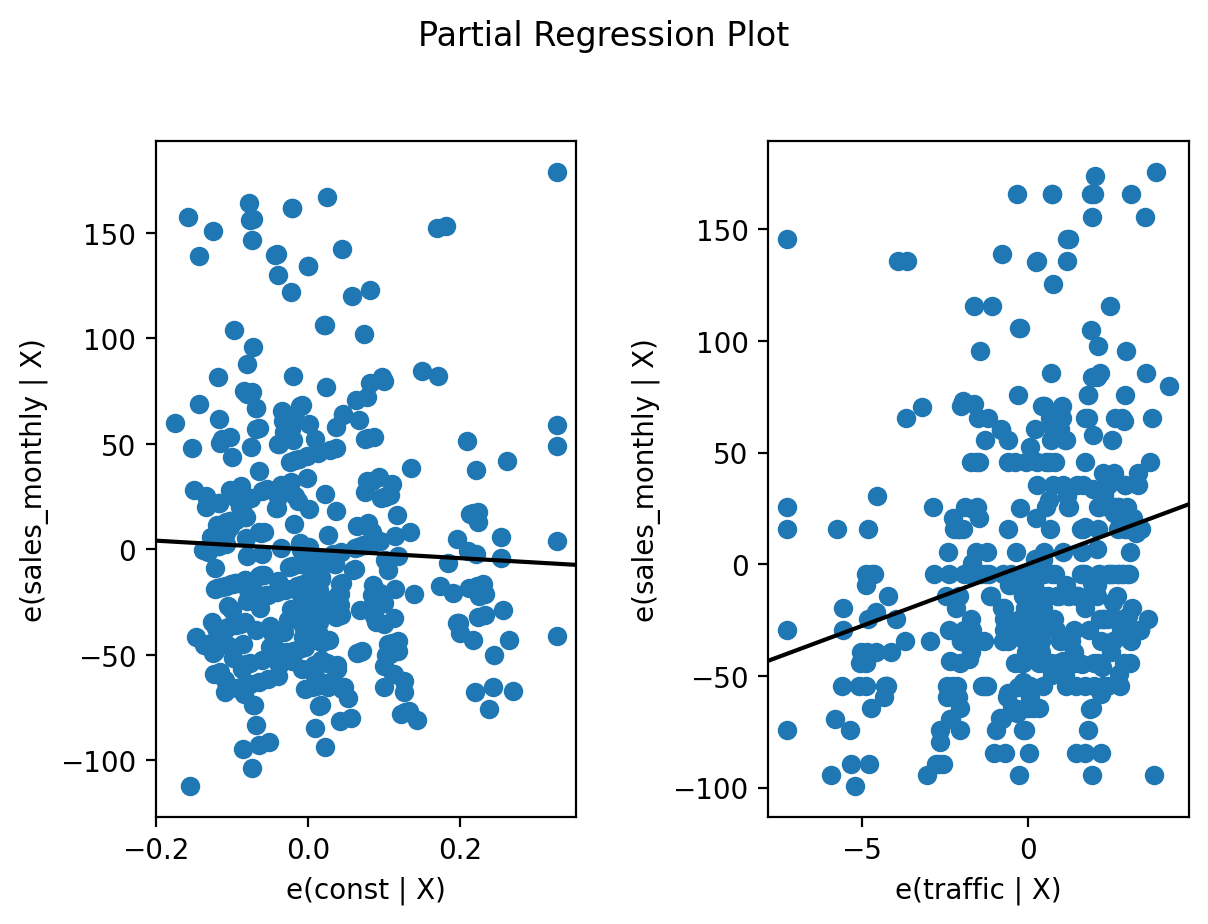

In [161]:
fig = sm.graphics.plot_partregress_grid(results)
fig.tight_layout(pad=2.0)

In [162]:
coef_b = []
coef_b1 = []
for _ in range(1000):
    df_ = df.sample(n=400)

    y = df_['sales_monthly']
    X = df_['traffic']
    
    X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    
    coef_b.append(results.params['const'])
    coef_b1.append(results.params['traffic'])

In [163]:
print(coef_b[:10])

[-52.476390117660756, -67.84606867512673, -61.835779914727354, -81.72988274718995, -56.41535225543946, -39.629553604268125, -3.2857253120510777, -31.866174552973618, -65.3609876445205, -33.83855096904083]


<Axes: ylabel='Count'>

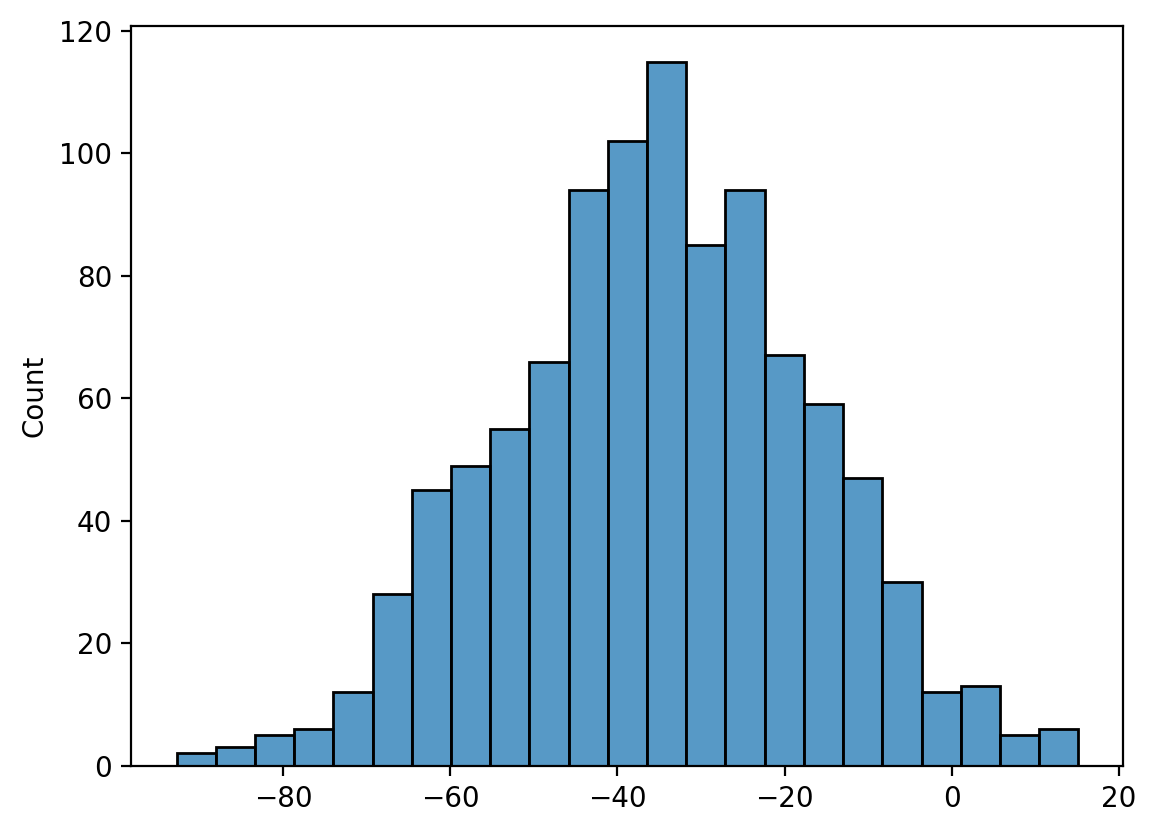

In [164]:
sns.histplot(data=pd.Series(coef_b))

<Axes: ylabel='Count'>

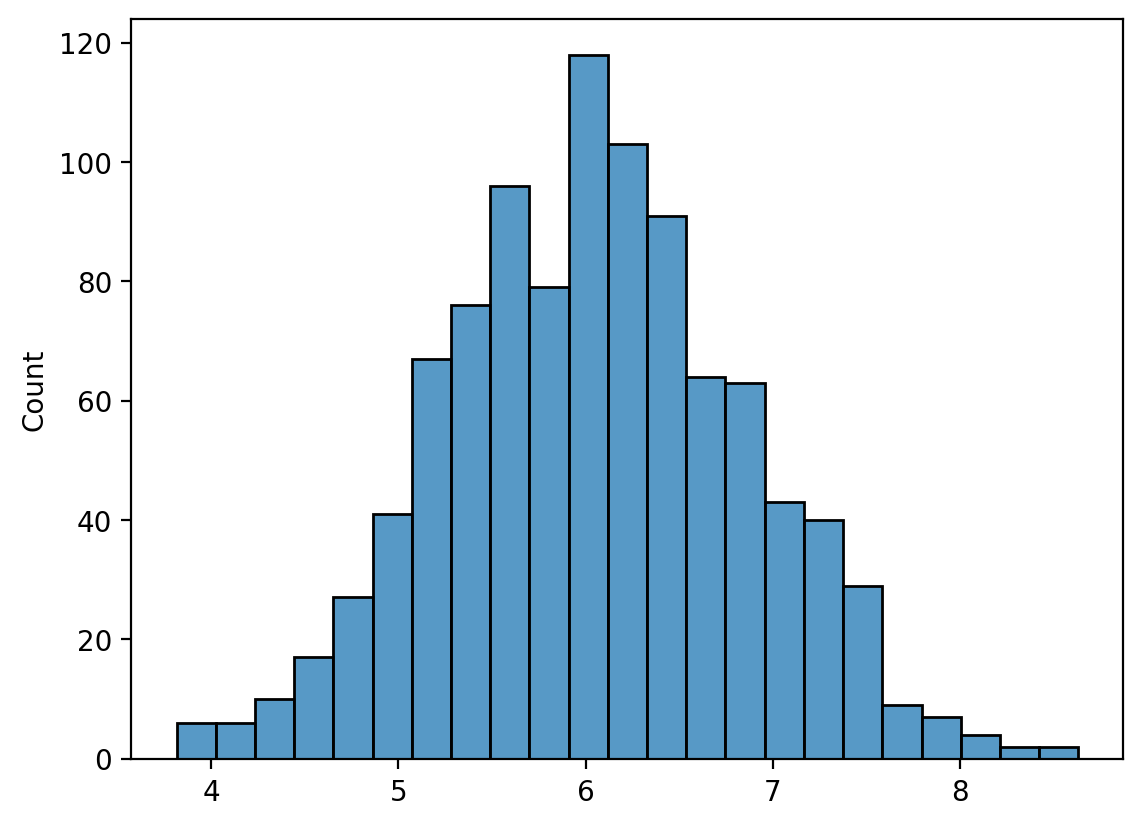

In [165]:
sns.histplot(data=pd.Series(coef_b1))

In [166]:
df = pd.read_excel('cars.xlsx')
df.head()

,Name,Weight (1000 lbs),MPG,Gallons per 100 miles,Horsepower
0,Audi A3,3.75,24,4.166667,200
1,Audi A4 QUATTRO,3.91,25,4.000000,211
2,Audi A4,3.92,25,4.000000,211
3,Audi A6,3.96,28,3.571429,211
4,Audi Q7,6.02,18,5.555556,225


In [167]:
y = df['MPG']
X = df['Weight (1000 lbs)']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     710.7
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           3.20e-81
Time:                        11:11:33   Log-Likelihood:                -756.40
No. Observations:                 303   AIC:                             1517.
Df Residuals:                     301   BIC:                             1524.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                43.2998      0.82

<Axes: xlabel='Weight (1000 lbs)', ylabel='MPG'>

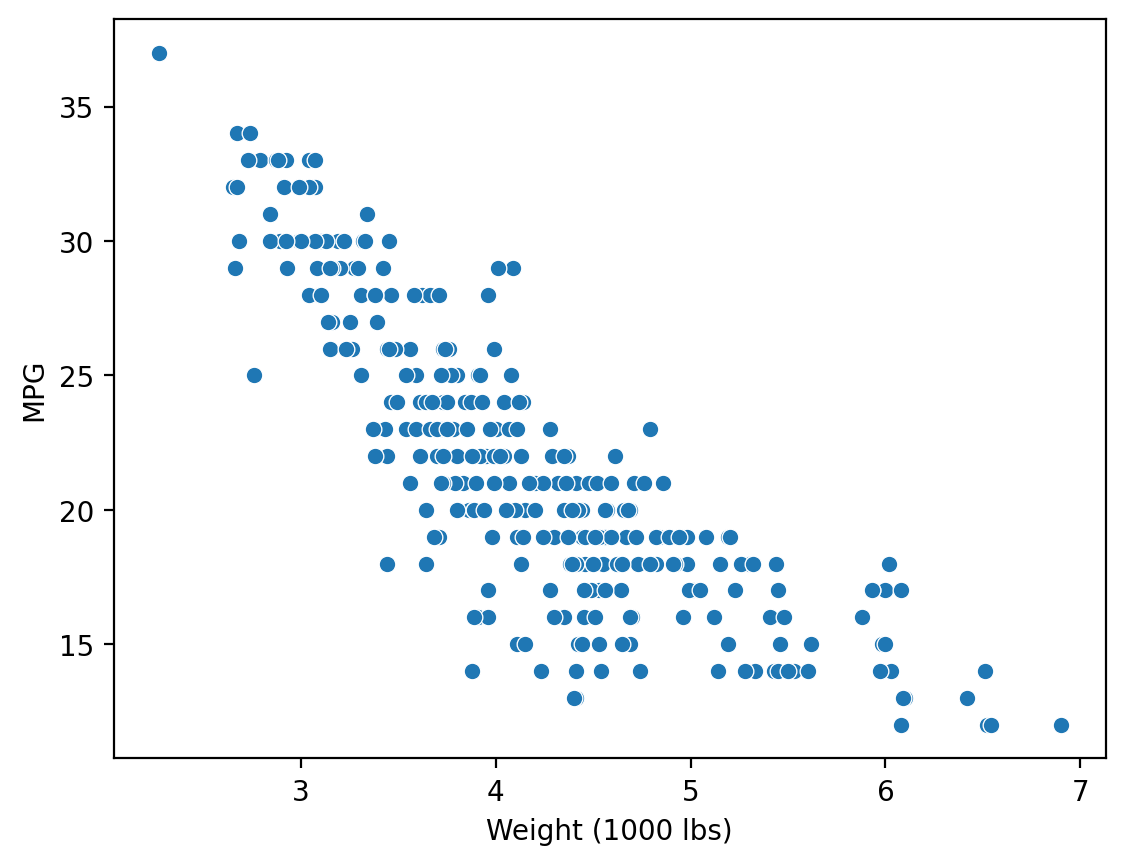

In [168]:
sns.scatterplot(data=df, x="Weight (1000 lbs)", y="MPG")


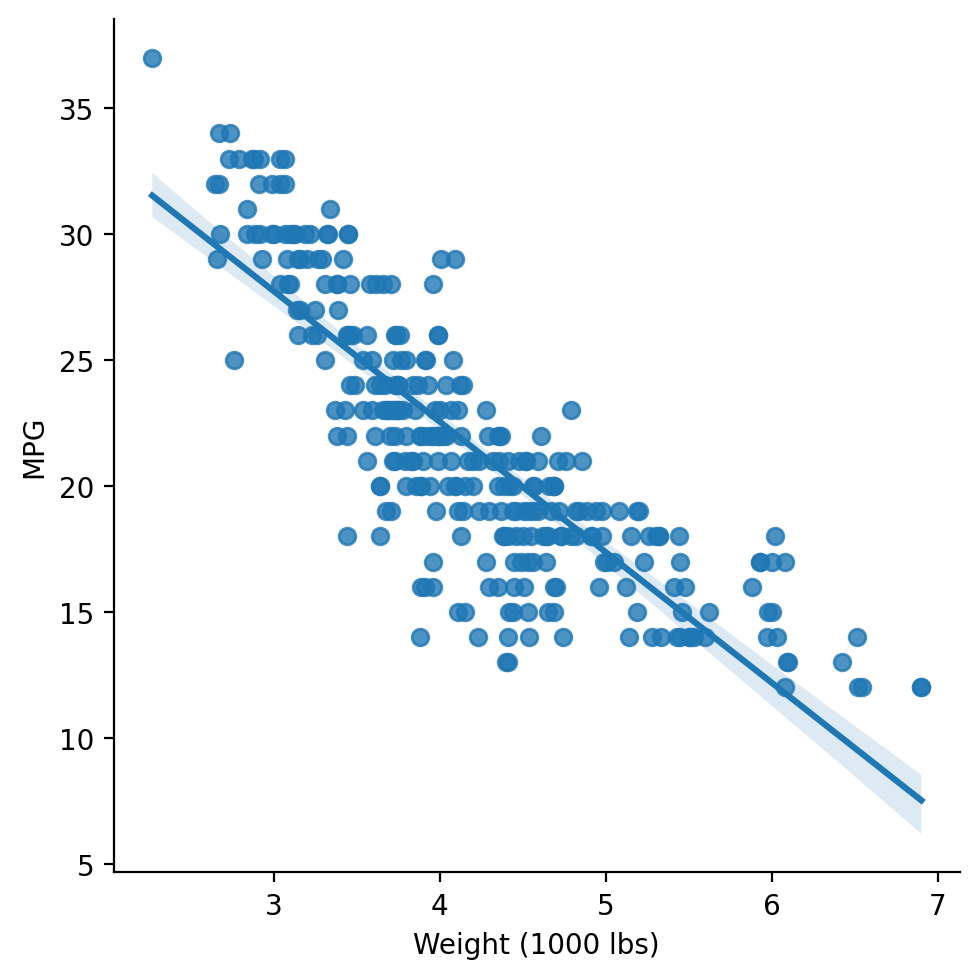

In [169]:
sns.lmplot(data=df, x="Weight (1000 lbs)", y="MPG")


In [170]:
df['weight_reciprocal'] = 1/df['Weight (1000 lbs)']
df['MPG_reciprocal'] = 1/df['MPG']
df['Gallons per 100 miles_reciprocal'] = 1/df['Gallons per 100 miles']

In [171]:
y = df['Gallons per 100 miles']
X = df['Weight (1000 lbs)']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                              OLS Regression Results                             
Dep. Variable:     Gallons per 100 miles   R-squared:                       0.713
Model:                               OLS   Adj. R-squared:                  0.712
Method:                    Least Squares   F-statistic:                     748.5
Date:                   Sun, 26 Nov 2023   Prob (F-statistic):           1.26e-83
Time:                           11:11:33   Log-Likelihood:                -306.11
No. Observations:                    303   AIC:                             616.2
Df Residuals:                        301   BIC:                             623.7
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const   

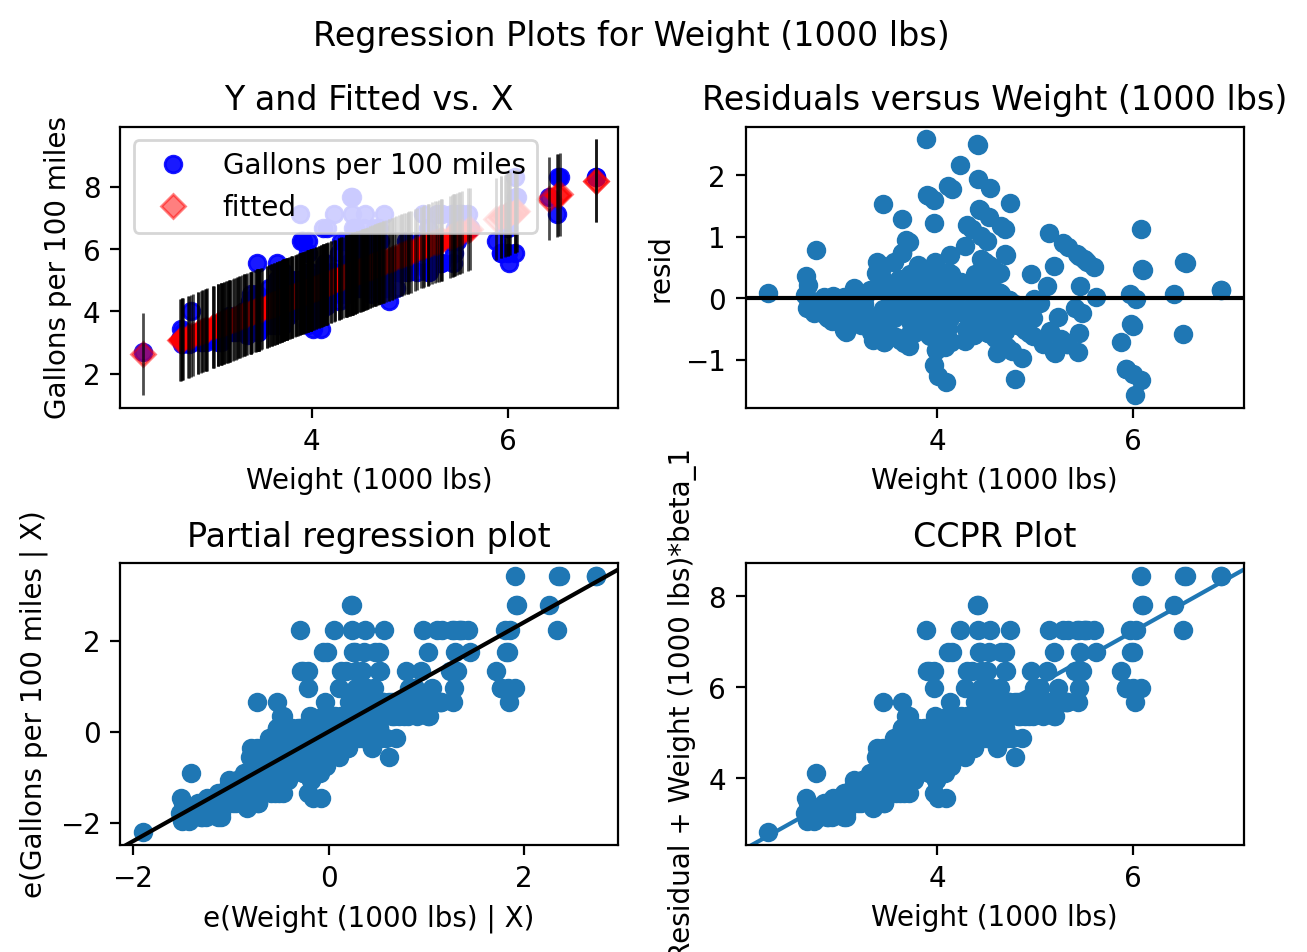

In [172]:
fig = sm.graphics.plot_regress_exog(results, "Weight (1000 lbs)")
fig.tight_layout(pad=1.0)

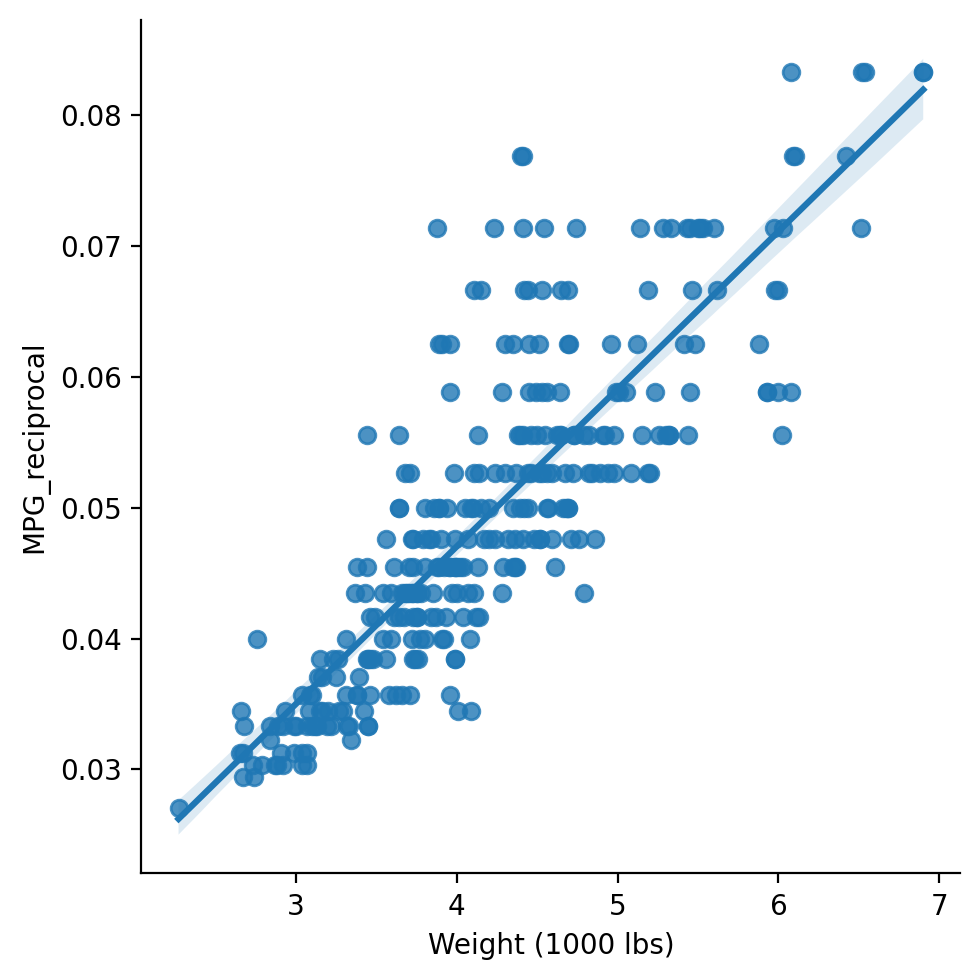

In [173]:
sns.lmplot(data=df, x="Weight (1000 lbs)", y="MPG_reciprocal")

In [174]:
df = pd.read_excel('CarPrice.xlsx')

In [175]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [176]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [177]:
df.sort_values(by=['highwaympg'], ascending=False)[['CarName','highwaympg']].head(3)

,CarName,highwaympg
30,honda civic,54
18,chevrolet impala,53
90,nissan gt-r,50


In [178]:
df.sort_values(by=['highwaympg'], ascending=True)[['CarName','highwaympg']].head(3)

,CarName,highwaympg
74,buick regal sport coupe (turbo),16
73,buick century special,16
49,jaguar xk,17


In [179]:
y = df['price']
X = df['highwaympg']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     192.4
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           3.23e-31
Time:                        11:11:34   Log-Likelihood:                -2064.1
No. Observations:                 205   AIC:                             4132.
Df Residuals:                     203   BIC:                             4139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.816e+04   1838.179     20.761      0.0

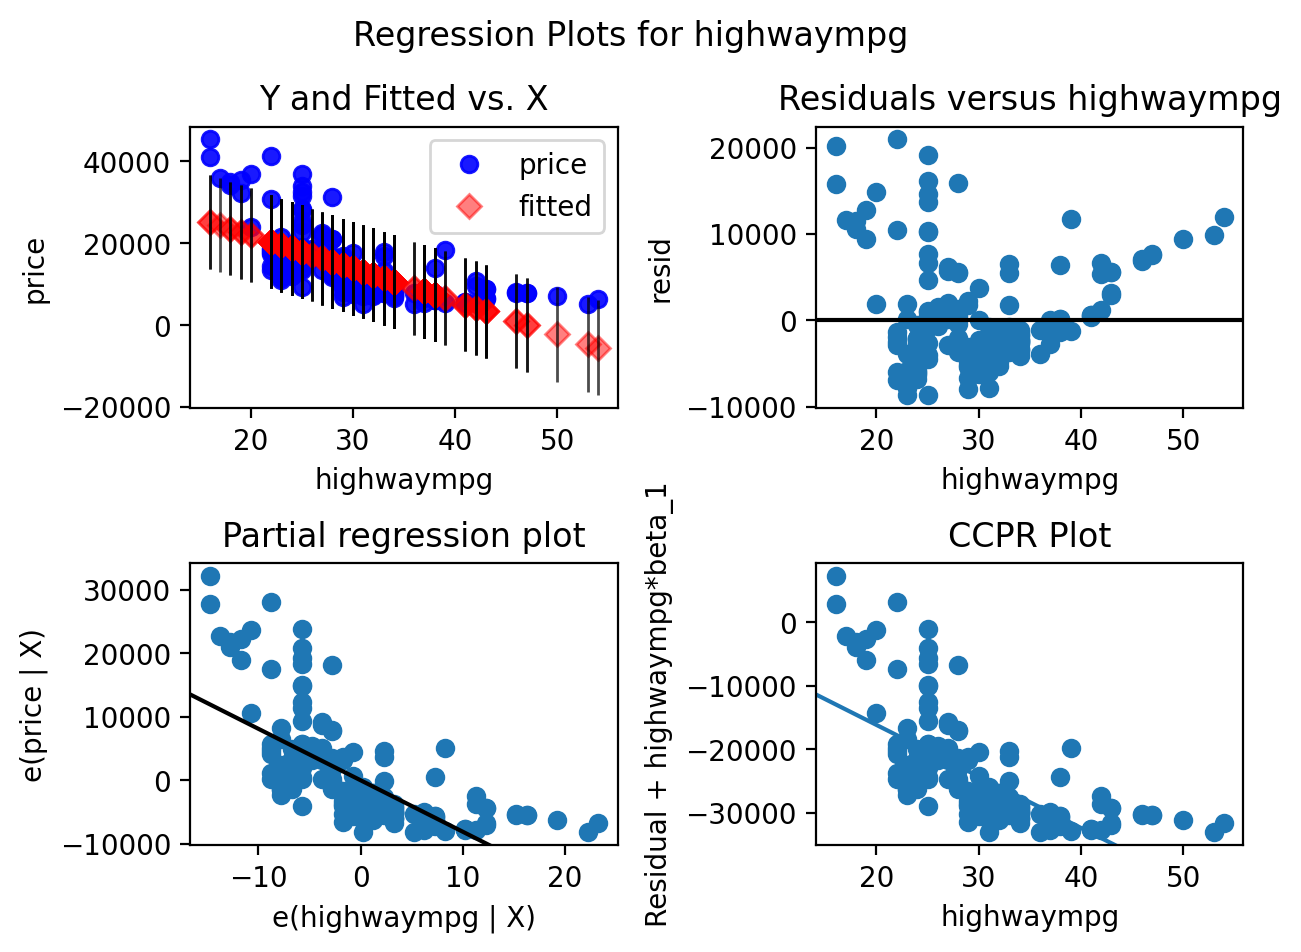

In [180]:
fig = sm.graphics.plot_regress_exog(results, "highwaympg")
fig.tight_layout(pad=1.0)

<Axes: xlabel='highwaympg', ylabel='price'>

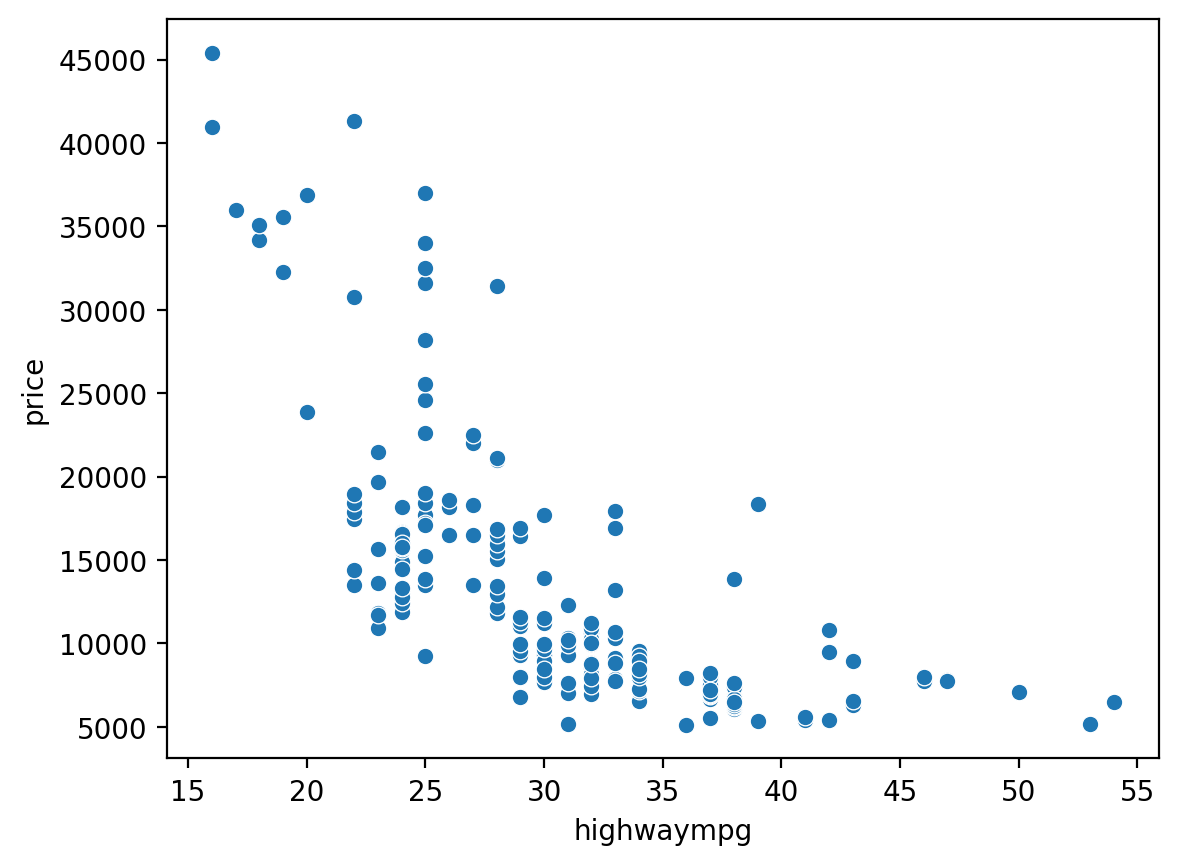

In [181]:
sns.scatterplot(data=df, x="highwaympg", y="price")

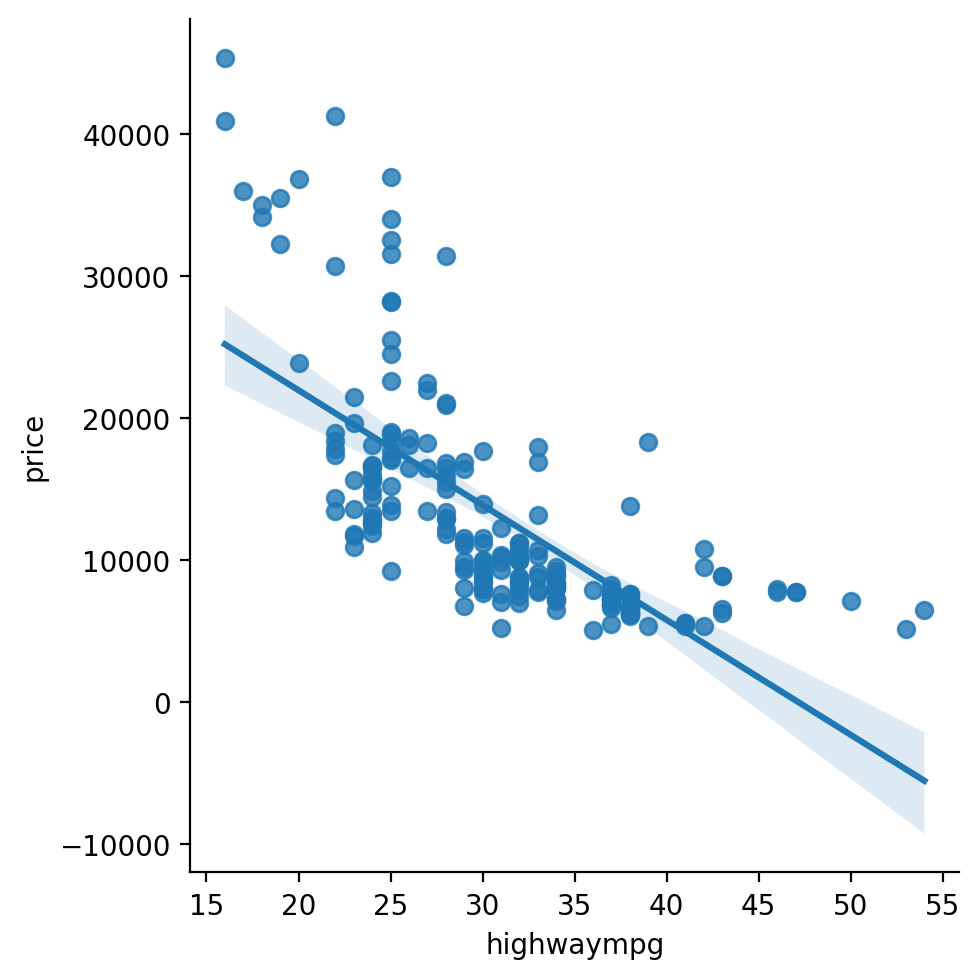

In [182]:
sns.lmplot(data=df, x="highwaympg", y="price")

In [183]:
df['price_log'] = np.log(df['price'])

In [184]:
y = df['price_log']
X = df['highwaympg']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     305.7
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.31e-42
Time:                        11:11:34   Log-Likelihood:                -55.682
No. Observations:                 205   AIC:                             115.4
Df Residuals:                     203   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0987      0.102    108.590      0.0

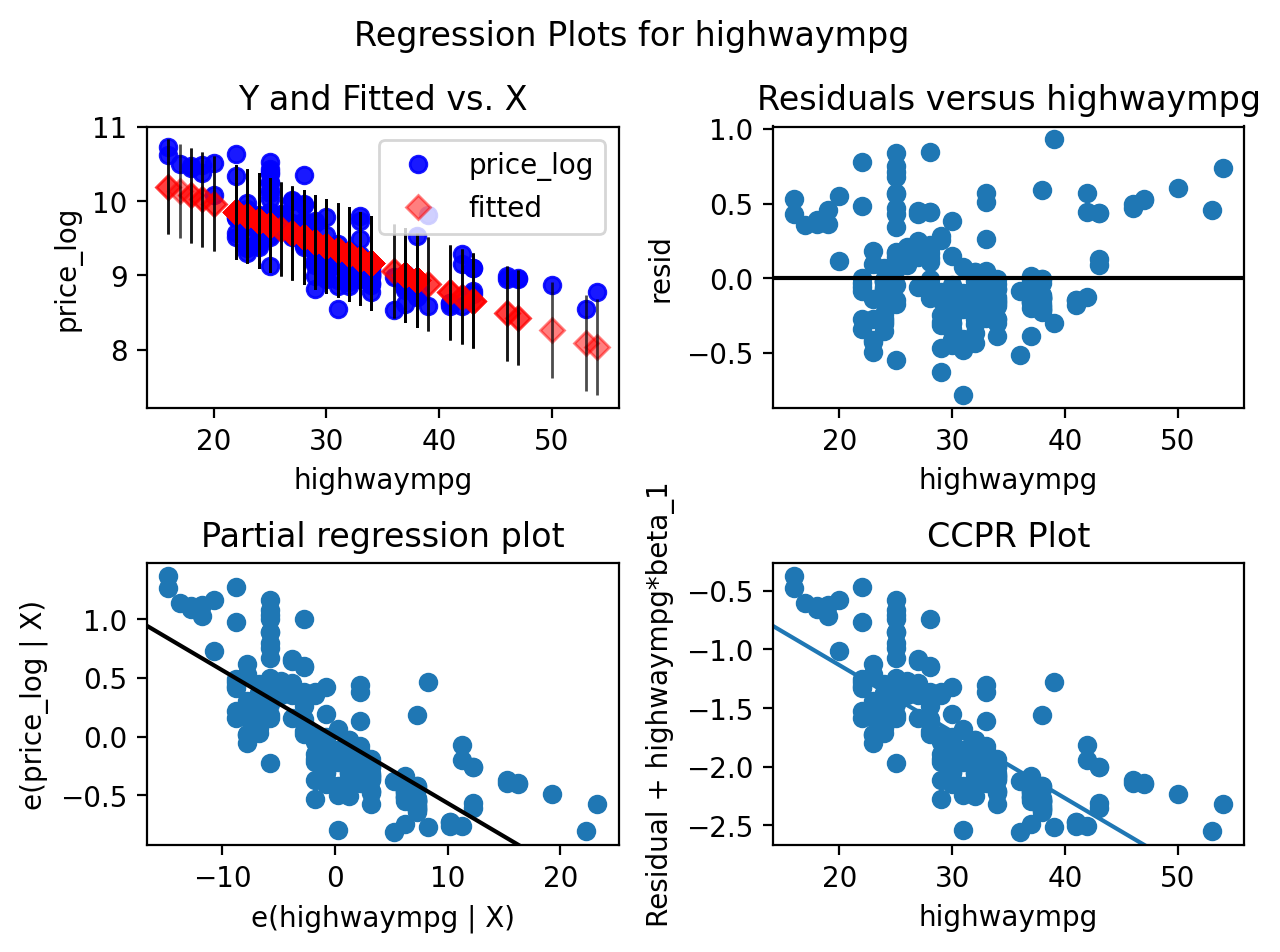

In [185]:
fig = sm.graphics.plot_regress_exog(results, "highwaympg")
fig.tight_layout(pad=1.0)

<Axes: xlabel='highwaympg', ylabel='price_log'>

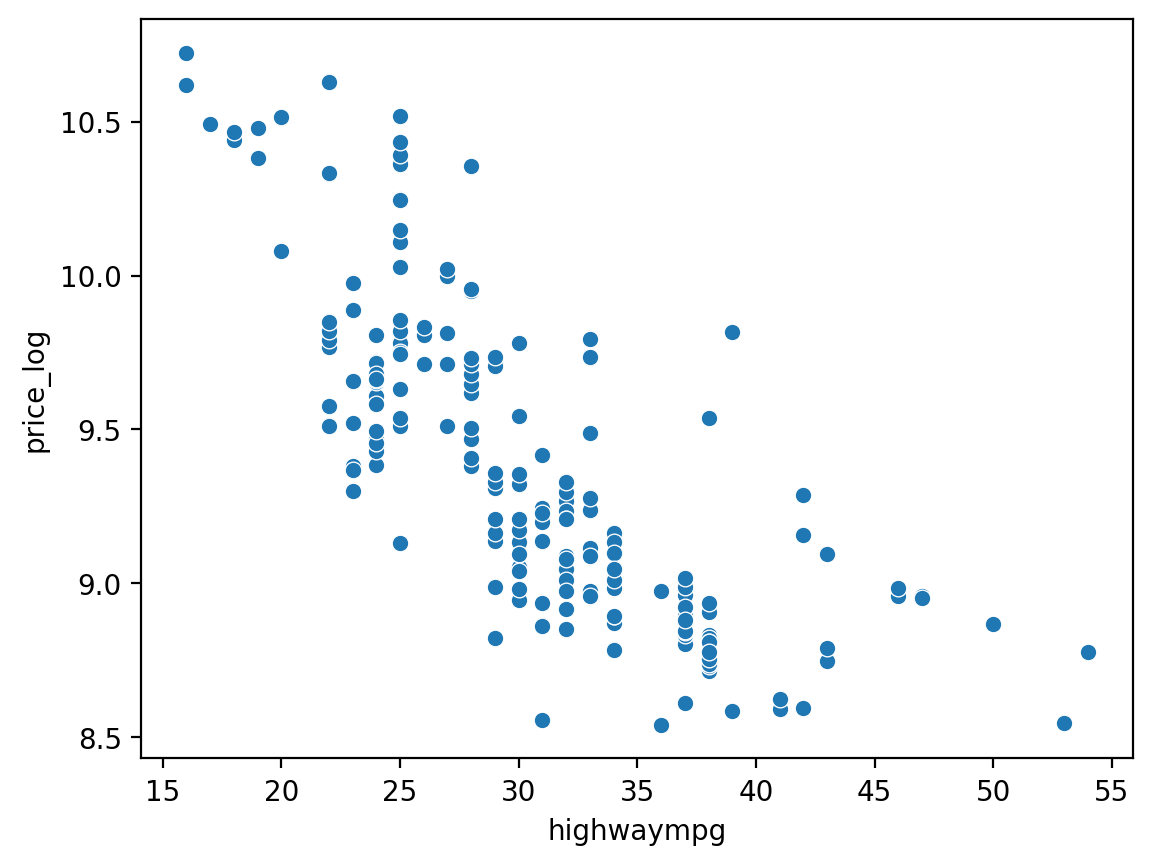

In [186]:
sns.scatterplot(data=df, x="highwaympg", y="price_log")

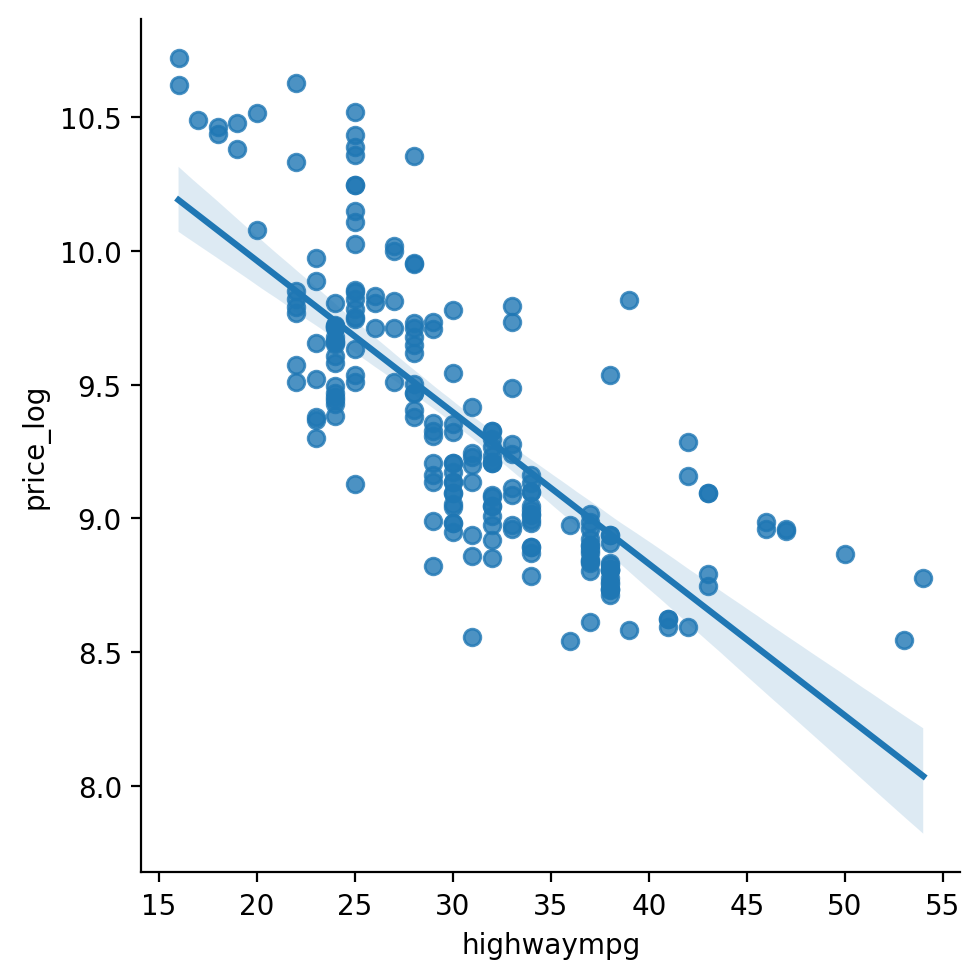

In [187]:
sns.lmplot(data=df, x="highwaympg", y="price_log")

In [188]:
patients = 1000

In [189]:
p1 = 0.1 * (21.4-7.8)/100*patients
p2 = 0.4 * (16.5-9.5)/100*patients
p3 = 0.4 * (10.3-6.8)/100*patients
print(p1, p2, p3)

13.6 28.000000000000004 14.000000000000004


In [190]:
hopsital_savings = (p1+p2+p3)*8000
hopsital_savings

444800.00000000006

In [191]:
dose_1 = 0.7 * patients
dose_2 = 0.15 * patients
dose_3 = 0.15 * patients
print(dose_1, dose_2, dose_3)


700.0 150.0 150.0


In [192]:
cost_angiomax = dose_1*40 + dose_2*2*40 + dose_3*3*40
cost_heparin = patients*2
print(cost_angiomax, cost_heparin)

58000.0 2000


In [193]:
(hopsital_savings-cost_angiomax)/patients

386.80000000000007

In [194]:
p1=(21.4-7.8)/100*8000
p2=(16.5-9.5)/100*8000
p3=(10.3-6.8)/100*8000
p1,p2,p3

(1087.9999999999998, 560.0, 280.00000000000006)

In [195]:
cost = 0.7*1 + 0.15*2 + 0.15*3
cost

1.45

In [196]:
p1/=cost
p2/=cost
p3/=cost
p1,p2,p3

(750.3448275862067, 386.2068965517241, 193.10344827586212)

In [197]:
p1+=2
p2+=2
p3+=3
p1,p2,p3

(752.3448275862067, 388.2068965517241, 196.10344827586212)

In [213]:
sql= f"""
       SELECT * FROM T WHERE A = 1
       UNION ALL
       SELECT * FROM T WHERE A = 2
    """
sql.split("UNION ALL")[0].split("FROM")[1]

' T WHERE A = 1\n       '